# Week 2 Solution
By Jaydeep Dholakia

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller

### Q1: Transform the mean temperature data with a 3 step sliding window.

In [20]:
series = pd.read_csv("../Week 1/testset.csv", header=0, index_col=0,parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
shifted = temps.shift(3)
dataframe = concat([shifted, temps], axis=1)
dataframe.columns = ['t+3', 't']
print(dataframe.head(5))

    t+3     t
0   NaN  30.0
1   NaN  28.0
2   NaN  24.0
3  30.0  24.0
4  28.0  23.0


## Q2: Write about the p-value, test statistic, critical values in detail and how are they important to determine stationarity of a dataset.

Let us understand what is Hypothesis before explaining other terms.
### Hypothesis:
A hypothesis is a speculation or theory based on insufficient evidence that lends itself to further testing and experimentation. With further testing, a hypothesis can usually be proven true or false.

### Null-Hypothesis:
A null hypothesis is a hypothesis that says there is no statistical significance between the two variables in the hypothesis. It is the hypothesis that we try to prove wrong. Which means we try to prove that there is statistical significance.

### Hypothesis Test:
A hypothesis test is rule that specifies whether to accept or reject a claim about a population depending on the evidence provided by a sample of data.

A hypothesis test examines two opposing hypotheses about a population: the null hypothesis and the alternative hypothesis. The null hypothesis is the statement being tested. Usually the null hypothesis is a statement of "no effect" or "no difference". The alternative hypothesis is the statement you want to be able to conclude is true based on evidence provided by the sample data.

### P-value:
The p-value is the probability of obtaining results as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct.

The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected.

### Test Statistic:
A test statistic measures the degree of agreement between a sample of data and the null hypothesis. Its observed value changes randomly from one random sample to a different sample. It also contains information which will be used to reject the null hypothesis.

### Critical Values:
In hypothesis testing, a critical value is a point on the test distribution that is compared to the test statistic to determine whether to reject the null hypothesis.

## Q.3: Understand ADF test mathematically

The testing procedure for the ADF test is the same as for the Dickey–Fuller test but it is applied to the model,

delta y_t = alpha + beta t + gamma y_{t-1} + delta_1 * delta y_{t-1} + ... + delta_{p-1} * delta y_{t-p+1} + epsilon_t

where alpha is a constant, beta the coefficient on a time trend and p the lag order of the autoregressive process.

## Q.4: Write about steps that can be taken to make a time-series stationary.

Steps involve:
1. Check what level of trend, seasonality, and noise is present in the data, by performing seasonal decomposing.
2. Detrend the data using differincing method.
3. Remove seasonality by applying different transformations.
4. Lastely compare Augmented Dickey-Fuller test results which are performed on different transformation results.

The one having the lowest p-value, Test Statistic, and Critical values gives use strong reason to reject null hypothesis, which means the data is stationary. It would also be seen by looking at the transformed data plotting.

## Q.5: Perform the analysis done in this week on the mean temperature dataset. Also, write in detail about the insights you found while doing the analysis.

Importing data and converting it into date and time, and indexing likewise

In [22]:
df = pd.read_csv("../Week 1/testset.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head()

,Temperature
datetime,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


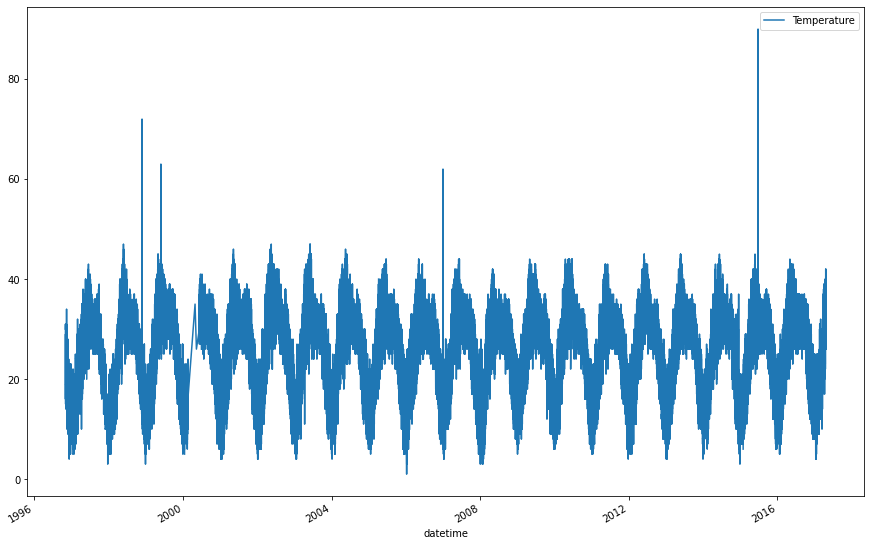

In [27]:
df.plot(figsize=(15,10))
plt.show()

As seen that around year 2000 there are missing values. So we will take data from year 2001 and resample data according to months

In [30]:
df = df['2001':]
df = df.resample('M').mean().interpolate()
df.head(10)

,Temperature
datetime,
2001-01-31,12.568436
2001-02-28,18.241270
2001-03-31,23.494737
2001-04-30,29.781388
2001-05-31,33.019526
2001-06-30,31.029197
2001-07-31,30.973164
2001-08-31,31.128134
2001-09-30,31.190202


This is how data looks like now:

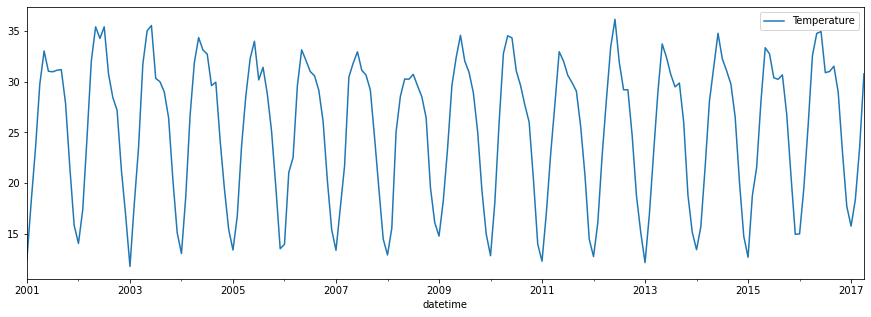

In [34]:
df.plot(figsize=(15,5))

Applying ADF and Rolling mean & Standar deviation graph to check if our data is stationary or not

In [39]:
def test_stationary(main_data):
    # Check with rolling mean & Standard Deviation
    rollmean = main_data.rolling(window=24).mean()
    rollstd = main_data.rolling(window=24).std()
    #plt.figure(figsize=(15,10))
    origal = plt.plot(main_data, color='blue', label='Orignal')
    mean = plt.plot(rollmean, color='red', label='Mean')
    std = plt.plot(rollstd, color='black', label='Standard Dev.')
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)
    
    # Check with Dickey-Fuller
    adf_values = adfuller(main_data)
    df_output = pd.Series(adf_values[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adf_values[4].items():
        df_output['Critical Value (%s)'%key] = value
    print("\nDickey-Fuller Test Results:\n",df_output)
    if adf_values[1] > 0.05 and df_output['Test Statistic'] > df_output['Critical Value (1%)']:
        print("\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
    else:
        print("\nStrong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")

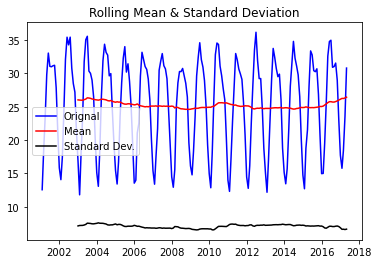


Dickey-Fuller Test Results:
 Test Statistic                  -1.438982
p-value                          0.563451
#Lags Used                      11.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [40]:
test_stationary(df)

### Insights:
As seen from the ADF test and graph that data is not stationary. Because the p-value which should be below 0.05 and Test Statistic which should be smaller than Critical Value, do not give us strong reasons to reject the Null Hypothesis.